In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from IPython.display import Audio
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

sns.set()
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 200)

In [2]:
#Billboard Top 100 By Week from 1958 to 2021
bb100 = pd.read_csv('Hot Stuff.csv')

In [3]:
#First & Last 2 entries by Week/Year
bb100['WeekID'] = pd.DatetimeIndex(bb100['WeekID'])
bb100.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
18553,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,63,High School Confidential,Jerry Lee Lewis And His Pumping Piano,High School ConfidentialJerry Lee Lewis And His Pumping Piano,1,NaN,63,1
103337,http://www.billboard.com/charts/hot-100/1958-08-02,1958-08-02,98,Little Serenade,The Ames Brothers,Little SerenadeThe Ames Brothers,1,NaN,98,1
300806,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,61,Almost Maybes,Jordan Davis,Almost MaybesJordan Davis,2,64.0,61,17
152154,https://www.billboard.com/charts/hot-100/2021-05-29,2021-05-29,78,White Teeth,YoungBoy Never Broke Again,White TeethYoungBoy Never Broke Again,1,NaN,78,1


In [4]:
#Getting Data From The 60's, 70's, 80's, 90's, 00's, 10's
bb60s = bb100[(bb100['WeekID'] >= '1960-1-1') & (bb100['WeekID'] < '1970-1-1')]
bb70s = bb100[(bb100['WeekID'] >= '1970-1-1') & (bb100['WeekID'] < '1980-1-1')]
bb80s = bb100[(bb100['WeekID'] >= '1980-1-1') & (bb100['WeekID'] < '1990-1-1')]
bb90s = bb100[(bb100['WeekID'] >= '1990-1-1') & (bb100['WeekID'] < '2000-1-1')]
bb2000s = bb100[(bb100['WeekID'] >= '2000-1-1') & (bb100['WeekID'] < '2010-1-1')]
bb2010s = bb100[(bb100['WeekID'] >= '2010-1-1') & (bb100['WeekID'] < '2020-1-1')]

In [5]:
bb2010s.sort_values(by='WeekID').iloc[np.r_[0:2, -2:0]]

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
45759,http://www.billboard.com/charts/hot-100/2010-01-02,2010-01-02,84,On Fire,Lil Wayne,On FireLil Wayne,1,62.0,62,2
242592,http://www.billboard.com/charts/hot-100/2010-01-02,2010-01-02,26,Money To Blow,Birdman Featuring Lil Wayne & Drake,Money To BlowBirdman Featuring Lil Wayne & Drake,1,26.0,26,11
169774,https://www.billboard.com/charts/hot-100/2019-12-28,2019-12-28,53,Like It's Christmas,Jonas Brothers,Like It's ChristmasJonas Brothers,1,61.0,53,3
197357,https://www.billboard.com/charts/hot-100/2019-12-28,2019-12-28,35,Woah,Lil Baby,WoahLil Baby,1,28.0,16,6


In [6]:
bb2010s.count()

url                       52200
WeekID                    52200
Week Position             52200
Song                      52200
Performer                 52200
SongID                    52200
Instance                  52200
Previous Week Position    46581
Peak Position             52200
Weeks on Chart            52200
dtype: int64

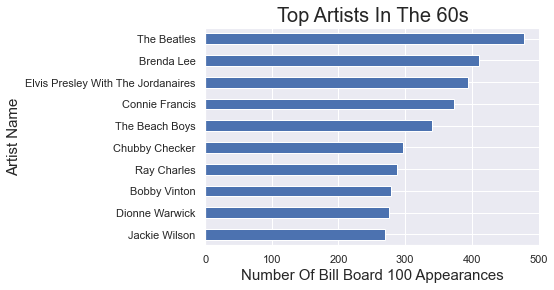

In [7]:
bb60s['Performer'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title('Top Artists In The 60s', fontsize=20)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel('Number Of Bill Board 100 Appearances', fontsize=15);

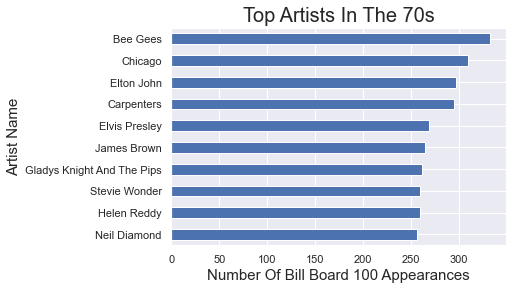

In [8]:
bb70s['Performer'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title('Top Artists In The 70s', fontsize=20)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel('Number Of Bill Board 100 Appearances', fontsize=15);

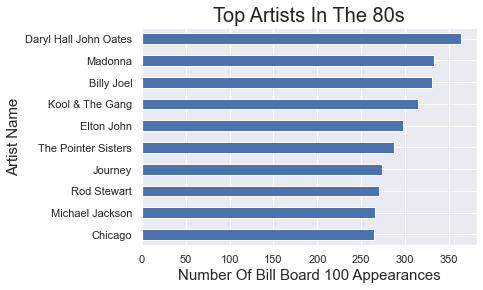

In [9]:
bb80s['Performer'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title('Top Artists In The 80s', fontsize=20)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel('Number Of Bill Board 100 Appearances', fontsize=15);

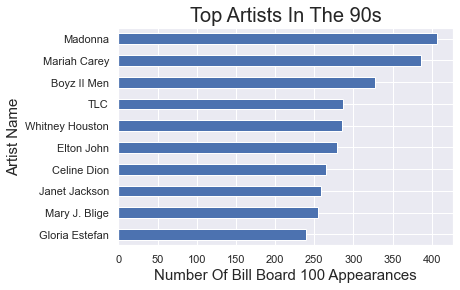

In [10]:
bb90s['Performer'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title('Top Artists In The 90s', fontsize=20)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel('Number Of Bill Board 100 Appearances', fontsize=15);

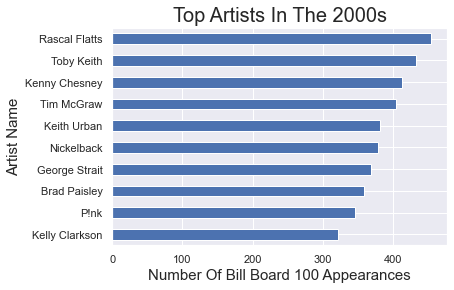

In [11]:
bb2000s['Performer'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title('Top Artists In The 2000s', fontsize=20)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel('Number Of Bill Board 100 Appearances', fontsize=15);

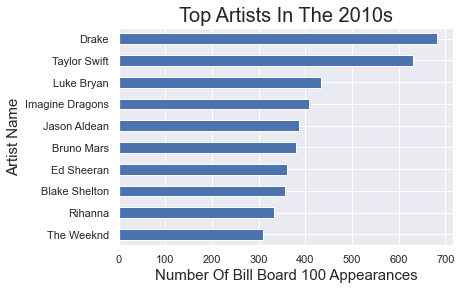

In [12]:
bb2010s['Performer'].value_counts()[:10].plot(kind='barh').invert_yaxis()
plt.title('Top Artists In The 2010s', fontsize=20)
plt.ylabel('Artist Name', fontsize=15)
plt.xlabel('Number Of Bill Board 100 Appearances', fontsize=15);